In [1]:
import argparse
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from tqdm import tqdm_notebook as tqdm
import sys

input_file = "/datasets/DTLD/JSON/DTLD_all.json"
%matplotlib inline

In [2]:
df = pd.read_json(input_file)

In [3]:
classes_labels = [[1, 2, 3, 4],\
                  [0, 1, 2, 3],\
                  [1, 2, 3, 4, 5, 6, 7],\
                  [1, 2, 3, 4],\
                  [0, 1, 2, 3, 4],\
                  [0, 1, 2, 3, 4, 5, 6, 7 ,8, 9]]
names = ['position', 'relevance', 'orientation', 'num_lights', 'colours', 'pictogram']
classes_names  = [['front', 'back', 'left', 'right'],\
                  ['not relevant', 'relevant', 'not relevant, occluded', 'relevant, occluded'],\
                  ['horizontal',  'vertical', 'horizontal without frame',\
                   'vertical without frame', '-',\
                   'horizontal Bus/Tram', 'vertical bus/tram'],\
                  ['single light', 'dual light', 'triple light', 'fourth light'],\
                  ['light off','red', 'yellow', 'red-yellow', 'green'],\
                  ['no light mask', 'arrow straight', 'arrow left', 'arrow left + straight',\
                   'arrow right', 'arrow right + straight','-',\
                   'arrow left + right + straight', 'pedestrian',\
                   'cyclist']]

In [4]:
def count_labels(count_dict, x, step=0.5):
    result = 0
    labels_list = [i for i in count_dict.keys() if i >= x - step and i < x + step]
    for i in labels_list:
        result += count_dict[i]
    return result

## class distribution

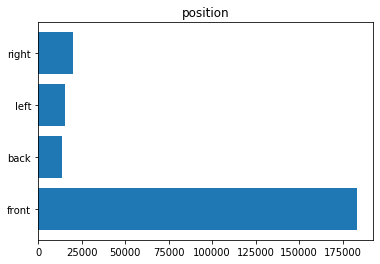

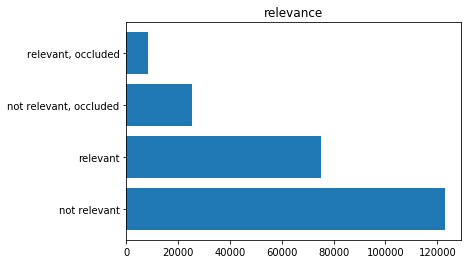

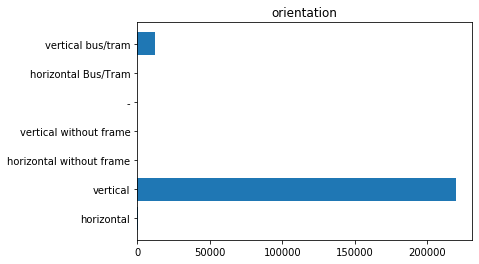

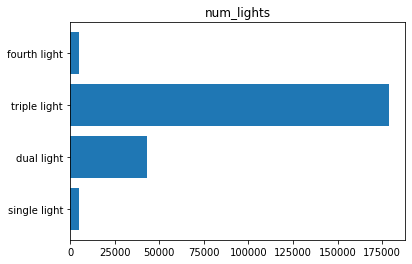

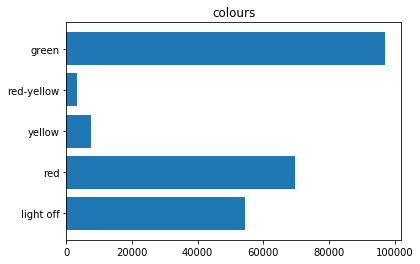

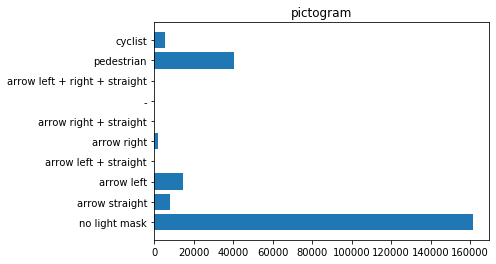

In [5]:
for j in tqdm(range(6)):
    all_classes = [str(d['class_id'])[j] for i, row in df.iterrows() for d in row['objects']]
    count_classes = [all_classes.count(str(c)) for c in classes_labels[j]]
    fig, ax = plt.subplots()
    ax.barh(classes_names[j], count_classes)
    ax.set(title=names[j])

## width, height and area distribution

### height

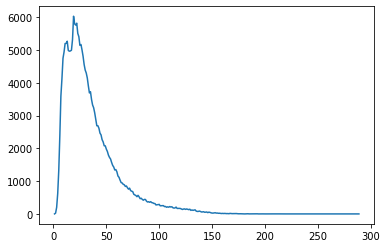

In [6]:
all_heights = [d['height'] for i, row in df.iterrows() for d in row['objects']]
set_heights = list(set(all_heights))
count_heights = [all_heights.count(c) for c in set_heights]
fig, ax = plt.subplots()
ax.plot(set_heights, count_heights)
plt.show()

### width

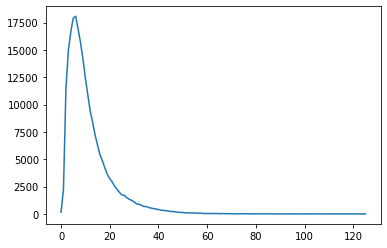

In [7]:
all_widths = [d['width'] for i, row in df.iterrows() for d in row['objects']]
set_widths = list(set(all_widths))
count_widths = [all_widths.count(c) for c in set_widths]
fig, ax = plt.subplots()
ax.plot(set_widths, count_widths)
plt.show()

### area

In [8]:
all_areas = [d['width'] * d['height'] for i, row in df.iterrows() for d in row['objects']]
set_areas = set(all_areas)
count_areas_dict = dict((key, all_areas.count(key)) for key in set_areas)
x = np.arange(min(set_areas), max(set_areas)/10, 50)
y = [count_labels(count_areas_dict, xx, 0.5) for xx in x]

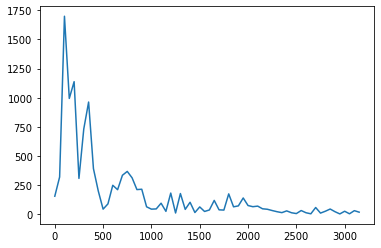

In [37]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

## ratio distribution

In [10]:
all_ratios = [d['height']/max(1,d['width']) for i, row in df.iterrows() for d in row['objects']]
set_ratios = set(all_ratios)
count_ratios_dict = dict((key, all_ratios.count(key)) for key in set_ratios)
x = np.arange(min(set_ratios), max(set_ratios)/5, 0.2)
y = [count_labels(count_ratios_dict, xx, 0.5) for xx in x]

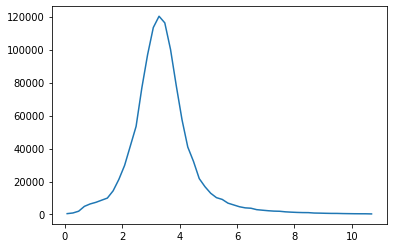

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

### termomap

In [12]:
termomap = np.zeros((1, 1024, 2048))

In [13]:
for index, row in df.iterrows():
    for bbox in row['objects']:
        termomap[0, bbox['y']:bbox['y'] + bbox['height'], bbox['x']:bbox['x'] + bbox['width']] += 1

In [15]:
termomap_r = np.zeros((1, 1024, 2048))

In [16]:
for index, row in df.iterrows():
    for bbox in row['objects']:
        if str(bbox['class_id'])[1] == '1' or str(bbox['class_id'])[1] == '3' :
            termomap_r[0, bbox['y']:bbox['y'] + bbox['height'], bbox['x']:bbox['x'] + bbox['width']] = 1
        else:
            continue
            #print(bbox['class_id'])

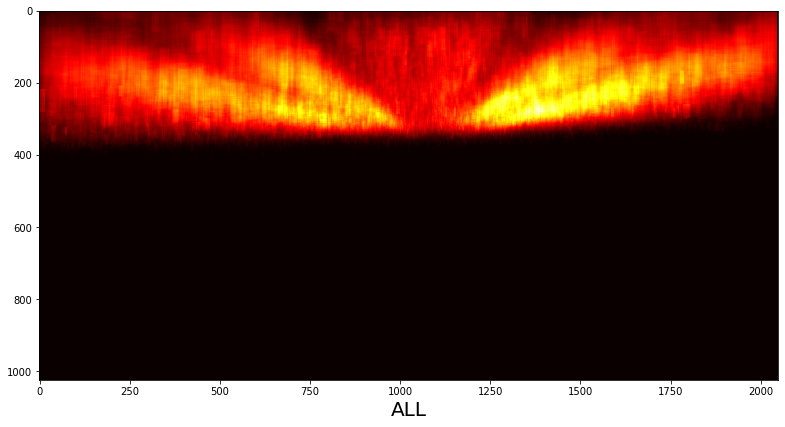

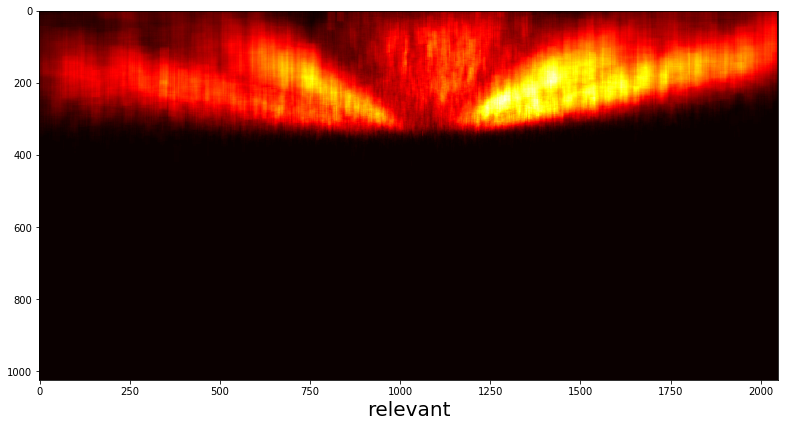

In [25]:
plt.figure(figsize=(45,45))
plt.subplot(1,3,1)
plt.imshow(termomap[0], cmap='hot')
plt.xlabel('ALL', size=20)
plt.show()

plt.figure(figsize=(45,45))
plt.subplot(1,3,1)
plt.imshow(termomap_r[0], cmap='hot')
plt.xlabel('relevant', size=20)
plt.show()